<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch9_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DBSCAN Fraud Detection

Credit card fraud dataset from Google Cloud or Kaggle

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 9/creditcard.csv')

In [ ]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(credit)

284807

In [ ]:
credit = credit.sample(frac=1)

In [ ]:
credit2 = credit[:5000]

Use cluster analysis to detect fraud

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
df_x = ["Time", "Amount", "Class"]
x = credit2.drop(df_x, axis=1)
x.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
251801,2.073313,-0.122388,-2.158447,0.235931,0.766974,-0.567497,0.506280,-0.310945,0.686377,-0.072956,...,0.519205,-0.172148,-0.042283,-0.006888,-0.049621,0.048769,0.454522,-0.212824,-0.051175,-0.061925
83899,-0.515855,1.072322,1.361285,-0.386445,0.478330,-0.069638,0.670795,0.099406,-0.747002,-0.194454,...,0.650820,0.179596,-0.212574,-0.550627,-0.172131,-0.497657,-0.141797,0.100930,0.307680,0.159844
181905,-0.682567,-0.065847,-2.329721,-3.268250,3.297478,3.098167,-0.348620,-2.287287,-1.875900,-0.164351,...,-0.331698,0.597103,-0.858357,1.674968,0.197003,0.739483,-0.268880,-0.180401,0.049430,-0.046160
80752,1.129330,-0.058391,1.177031,1.146259,-0.717916,0.326159,-0.631246,0.228529,0.573670,-0.049042,...,0.197490,-0.073896,-0.024889,0.121096,-0.065465,0.028376,0.445859,-0.408363,0.071295,0.026347


In [ ]:
x = np.array(x)

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
KNN = NearestNeighbors(n_neighbors=2*28) #2 x number of variables
neighbors = KNN.fit(x)
distances, indices = neighbors.kneighbors(x)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

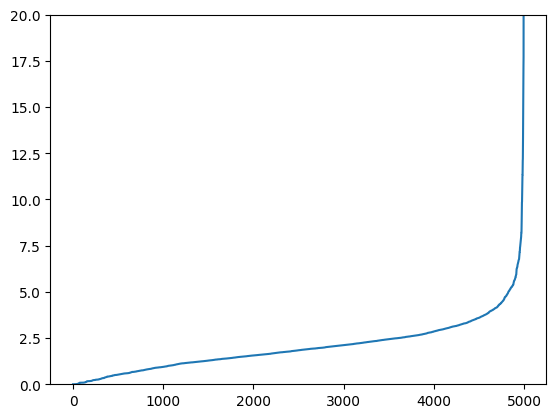

In [ ]:
plt.plot(distances)
plt.ylim(0, 20)
plt.show()

In [ ]:
dbs = DBSCAN(eps=5, min_samples=2*28)
dbs.fit(x)
cl = dbs.labels_
cl

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

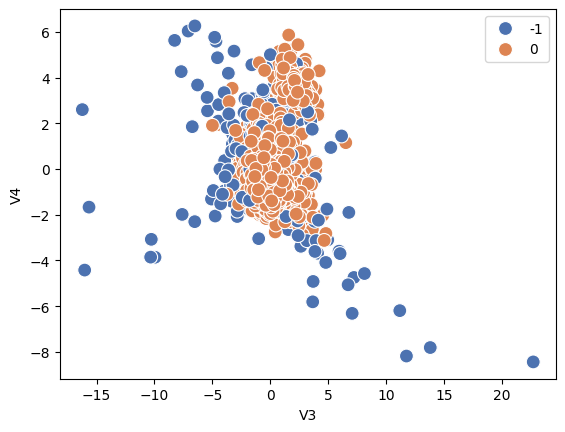

In [ ]:
scatterplot(x=credit2["V5"],y=credit2["V6"], hue=cl, palette="deep")
plt.xlabel('V3')
plt.ylabel('V4')
plt.show()

## Fraud Detection Using Benford's Law

In [ ]:
apple = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/apple.xlsx')

In [ ]:
apple.head()

,Unnamed: 0,2023,2022,2021,2020
0,Total Revenue,38553360.0,394328000.0,365817000.0,277515000.0
1,Cost of Revenue,214137000.0,223546000.0,212981000.0,169559000.0
2,Gross Profit,169148000.0,172782000.0,152836000.0,111556000.0
3,Operating Expense,53754000.0,51345000.0,43887000.0,38668000.0
4,Operating Income,114301000.0,119437000.0,108949000.0,67780000.0


In [ ]:
app = pd.concat([apple[2023], apple[2022], apple[2021], apple[2020]])
app.abs()

0      38553360.0
1     214137000.0
2     169148000.0
3      53754000.0
4     114301000.0
         ...     
23     81020000.0
24    169559000.0
25     11056000.0
26     57456000.0
27     81020000.0
Length: 112, dtype: float64

In [ ]:
dig_app = app.astype(str).str[:1]
dig_app

0     3
1     2
2     1
3     5
4     1
     ..
23    8
24    1
25    1
26    5
27    8
Length: 112, dtype: object

In [ ]:
dig_app = dig_app[dig_app != '-']
dig_app = dig_app.apply(int)

In [ ]:
freq = dig_app.value_counts().sort_index()
freq

1    41
2    16
3     9
4     1
5     9
6     9
8     4
9    16
Name: count, dtype: int64

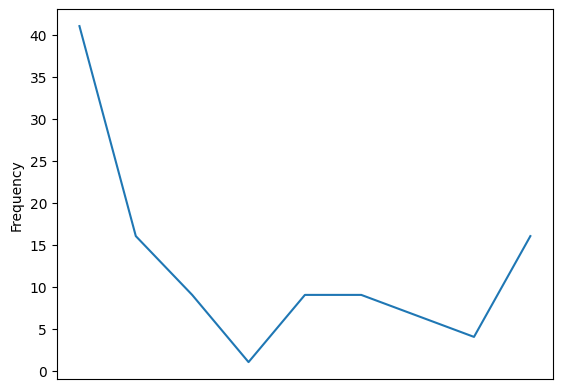

In [ ]:
plt.plot(freq.index, freq.values)
plt.xticks([])
plt.ylabel("Frequency")
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline

In [ ]:
def smoothify(yInput, topwordlist):
    x = np.array(range(0,len(topwordlist.index)))
    y = np.array(yInput)
    x_smooth = np.linspace(x.min(), x.max(), 600)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    return x_smooth, y_smooth

In [ ]:
ziffianCurveValues = [100/i for i in range(1, len(freq.index)+1)]

In [ ]:
x, y = smoothify(ziffianCurveValues, freq)

In [ ]:
freq_per = freq.values/freq.values[0]*100

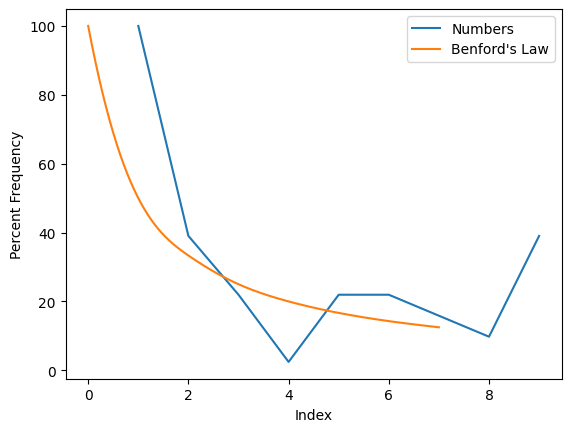

In [ ]:
plt.plot(freq.index, freq_per)
plt.plot(x+1,y)
plt.legend(["Numbers", "Benford's Law"])
plt.ylabel("Percent Frequency")
plt.xlabel("Index")
plt.show()

## Outlier Detection Using Regression Models

### Prophet Model

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
run = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 9/runtime.csv')

In [ ]:
run.head()

,Hour,Runtime
0,6/9/23 0:00,1848.46
1,6/9/23 1:00,1828.53
2,6/9/23 2:00,2046.14
3,6/9/23 3:00,1877.21
4,6/9/23 4:00,1642.56


In [ ]:
from seaborn import scatterplot
import matplotlib.pyplot as plt

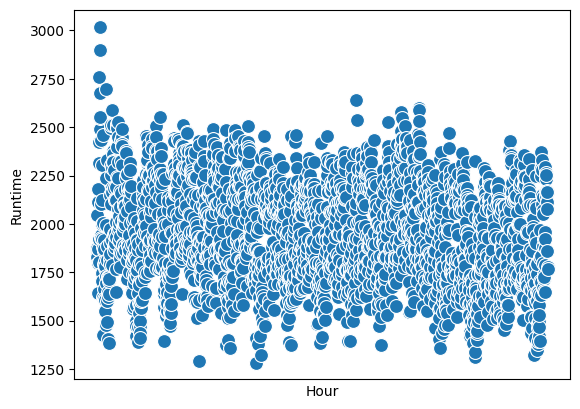

In [ ]:
scatterplot(x=run["Hour"],y=run["Runtime"])
plt.xlabel('Hour')
plt.ylabel('Runtime')
plt.xticks([])
plt.show()

In [ ]:
run['Hour'] = run['Hour'].astype('datetime64[ns]')

In [ ]:
model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True)

In [ ]:
run.rename(columns={"Hour": "ds", "Runtime": "y"}, inplace=True)

In [ ]:
run.head()

,ds,y
0,2023-06-09 00:00:00,1848.46
1,2023-06-09 01:00:00,1828.53
2,2023-06-09 02:00:00,2046.14
3,2023-06-09 03:00:00,1877.21
4,2023-06-09 04:00:00,1642.56


In [ ]:
model.fit(run)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpimv4nvp_/25_54v53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimv4nvp_/6eoztzqq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31933', 'data', 'file=/tmp/tmpimv4nvp_/25_54v53.json', 'init=/tmp/tmpimv4nvp_/6eoztzqq.json', 'output', 'file=/tmp/tmpimv4nvp_/prophet_modelgqq94ibj/prophet_model-20240510222816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:28:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(run)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-09 00:00:00,1955.083260,1643.411125,2406.567396,1955.083260,1955.083260,65.873492,65.873492,65.873492,-189.438448,...,81.803714,81.803714,81.803714,173.508225,173.508225,173.508225,0.0,0.0,0.0,2020.956752
1,2023-06-09 01:00:00,1955.015727,1660.774596,2420.986841,1955.015727,1955.015727,85.825711,85.825711,85.825711,-166.306916,...,80.308829,80.308829,80.308829,171.823798,171.823798,171.823798,0.0,0.0,0.0,2040.841438
2,2023-06-09 02:00:00,1954.948194,1706.780359,2417.689418,1954.948194,1954.948194,117.851464,117.851464,117.851464,-130.951774,...,78.652663,78.652663,78.652663,170.150575,170.150575,170.150575,0.0,0.0,0.0,2072.799658
3,2023-06-09 03:00:00,1954.880661,1759.013639,2489.069391,1954.880661,1954.880661,173.615721,173.615721,173.615721,-71.699711,...,76.826881,76.826881,76.826881,168.488552,168.488552,168.488552,0.0,0.0,0.0,2128.496382
4,2023-06-09 04:00:00,1954.813128,1798.629171,2561.680742,1954.813128,1954.813128,239.971720,239.971720,239.971720,-1.688010,...,74.822005,74.822005,74.822005,166.837724,166.837724,166.837724,0.0,0.0,0.0,2194.784848


In [ ]:
performance = pd.merge(run, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [ ]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')

In [ ]:
performance.head()

,ds,y,yhat,yhat_lower,yhat_upper,anomaly,color,name
0,2023-06-09 00:00:00,1848.46,2020.956752,1643.411125,2406.567396,0,green,Within Confidence Interval
1,2023-06-09 01:00:00,1828.53,2040.841438,1660.774596,2420.986841,0,green,Within Confidence Interval
2,2023-06-09 02:00:00,2046.14,2072.799658,1706.780359,2417.689418,0,green,Within Confidence Interval
3,2023-06-09 03:00:00,1877.21,2128.496382,1759.013639,2489.069391,0,green,Within Confidence Interval
4,2023-06-09 04:00:00,1642.56,2194.784848,1798.629171,2561.680742,1,red,Anomaly


In [ ]:
performance['color'] = np.where(performance['anomaly']== 1, 'red', 'green')
performance['name'] = np.where(performance['anomaly'] == 1, 'Anomaly','Within Confidence Interval')

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.update_layout(
    height=800,
    title="Anomaly Detection",
    xaxis_title="Time",
    yaxis_title="Run Time (ms)",

)

fig.add_trace(go.Scatter(x=performance['ds'], y=performance['y'],
                    mode='markers',
                    name='Anomalies - Red Colored Dots',
                    marker_color=performance.color,

                        ))
fig.add_trace(go.Scatter(x=performance['ds'], y=performance['yhat'],
                    mode='lines',
                    name='Run Time',
                    marker_color="black"
                        ))
fig.show()